In [ ]:
import os
print("Dataset is available locally")

Repository already cloned.


In [ ]:
import pandas as pd
import os

dataset_path = 'dataset.csv'
img_dir = 'datasetV1/'
df = pd.read_csv(dataset_path)

df['label'] = df['type'] + '_' + df['state']
print(df[['name', 'type', 'state', 'label']].head())

print(f"Totale immagini: {len(df)}")


          name   type    state          label
0  image_1.jpg  apple  healthy  apple_healthy
1  image_2.jpg  apple  healthy  apple_healthy
2  image_3.jpg  apple  healthy  apple_healthy
3  image_4.jpg  apple  healthy  apple_healthy
4  image_5.jpg  apple  healthy  apple_healthy
Totale immagini: 3662


# Random visualization

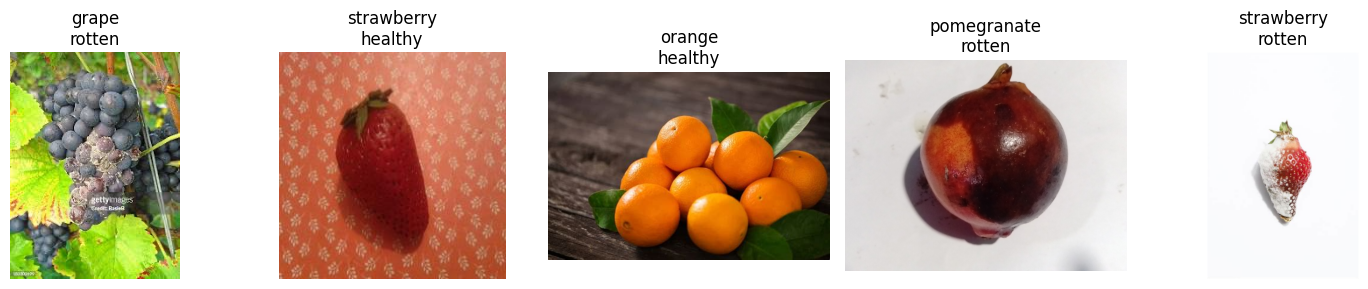

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

#5 random images
sample_indices = random.sample(range(len(df)), 5)

# Plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(sample_indices):
    img_path = os.path.join(img_dir, df.iloc[idx]['name'])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"{df.iloc[idx]['type']}\n{df.iloc[idx]['state']}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


# Data Exploration


In [ ]:
# ============================================
# DATA EXPLORATION
# ============================================

print("="*50)
print("DATASET OVERVIEW")
print("="*50)

# Basic info
print(f"\nTotal number of images: {len(df)}")
print(f"\nDataset columns: {df.columns.tolist()}")
print(f"\nDataset shape: {df.shape}")

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


DATASET OVERVIEW

Total number of images: 3662

Dataset columns: ['name', 'type', 'state', 'label']

Dataset shape: (3662, 4)

Missing values per column:
name     0
type     0
state    0
label    0
dtype: int64

Duplicate rows: 0


In [ ]:
print("\n" + "="*50)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*50)

# Distribution by product type
print("\n--- Distribution by Product Type ---")
type_counts = df['type'].value_counts()
print(type_counts)
print(f"\nTotal fruit types: {df['type'].nunique()}")

# Distribution by health state
print("\n--- Distribution by Health State ---")
state_counts = df['state'].value_counts()
print(state_counts)
print(f"\nTotal states: {df['state'].nunique()}")

# Distribution by type AND state (combined)
print("\n--- Distribution by Type × State (Combined Classes) ---")
combined_counts = df.groupby(['type', 'state']).size()
print(combined_counts)
print(f"\nTotal combined classes: {len(combined_counts)}")



CLASS DISTRIBUTION ANALYSIS

--- Distribution by Product Type ---
type
banana         422
apple          417
strawberry     408
pomegranate    405
grape          403
mango          403
tomato         402
cucumber       401
orange         401
Name: count, dtype: int64

Total fruit types: 9

--- Distribution by Health State ---
state
healthy    1842
rotten     1820
Name: count, dtype: int64

Total states: 2

--- Distribution by Type × State (Combined Classes) ---
type         state  
apple        healthy    215
             rotten     202
banana       healthy    215
             rotten     207
cucumber     healthy    202
             rotten     199
grape        healthy    202
             rotten     201
mango        healthy    200
             rotten     203
orange       healthy    201
             rotten     200
pomegranate  healthy    205
             rotten     200
strawberry   healthy    200
             rotten     208
tomato       healthy    202
             rotten     200
dtype: i

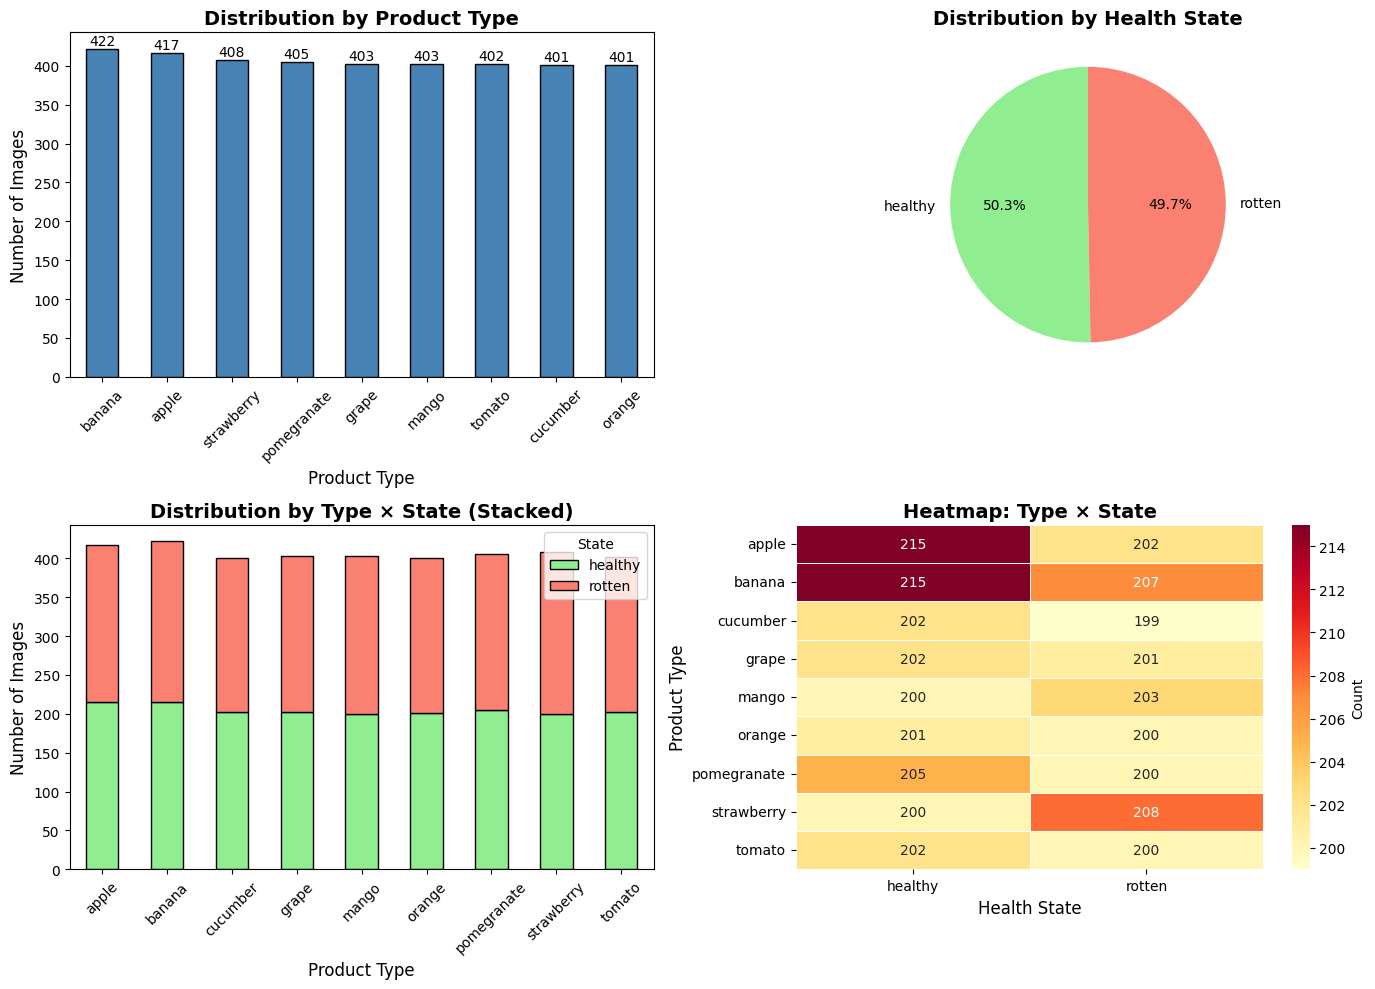

In [ ]:
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar plot: Product type distribution
ax1 = axes[0, 0]
type_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribution by Product Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Product Type', fontsize=12)
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(type_counts):
    ax1.text(i, v + 5, str(v), ha='center', fontsize=10)

# 2. Pie chart: Health state distribution
ax2 = axes[0, 1]
state_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                  colors=['lightgreen', 'salmon'])
ax2.set_title('Distribution by Health State', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# 3. Stacked bar: Type × State
ax3 = axes[1, 0]
df_pivot = df.groupby(['type', 'state']).size().unstack(fill_value=0)
df_pivot.plot(kind='bar', stacked=True, ax=ax3, color=['lightgreen', 'salmon'],
              edgecolor='black')
ax3.set_title('Distribution by Type × State (Stacked)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Product Type', fontsize=12)
ax3.set_ylabel('Number of Images', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='State', loc='upper right')

# 4. Heatmap: Type × State
ax4 = axes[1, 1]
sns.heatmap(df_pivot, annot=True, fmt='d', cmap='YlOrRd', ax=ax4,
            cbar_kws={'label': 'Count'}, linewidths=0.5)
ax4.set_title('Heatmap: Type × State', fontsize=14, fontweight='bold')
ax4.set_xlabel('Health State', fontsize=12)
ax4.set_ylabel('Product Type', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

print("\n" + "="*50)
print("IMAGE QUALITY CHECK")
print("="*50)

# Check image dimensions and formats
resolutions = []
aspect_ratios = []
file_sizes = []
corrupted_images = []

for idx, row in df.iterrows():
    img_path = img_dir + row['name']
    try:
        img = Image.open(img_path)
        resolutions.append(img.size)
        aspect_ratios.append(img.size[0] / img.size[1])
        file_sizes.append(os.path.getsize(img_path) / 1024)  # KB
    except Exception as e:
        corrupted_images.append(row['name'])
        print(f"Error loading {row['name']}: {e}")

if corrupted_images:
    print(f"\n⚠️ Found {len(corrupted_images)} corrupted images:")
    for img_name in corrupted_images:
        print(f"  - {img_name}")
else:
    print("\n✓ All images loaded successfully")

# Resolution statistics
unique_resolutions = set(resolutions)
print(f"\nUnique resolutions found: {len(unique_resolutions)}")
if len(unique_resolutions) <= 10:
    print("Resolutions (width × height):")
    for res in sorted(unique_resolutions, key=lambda x: x[0]):
        count = resolutions.count(res)
        print(f"  {res[0]} × {res[1]}: {count} images")

# Aspect ratio statistics
aspect_ratios = np.array(aspect_ratios)
print(f"\nAspect ratio stats:")
print(f"  Mean: {aspect_ratios.mean():.2f}")
print(f"  Std: {aspect_ratios.std():.2f}")
print(f"  Min: {aspect_ratios.min():.2f}")
print(f"  Max: {aspect_ratios.max():.2f}")

# File size statistics
file_sizes = np.array(file_sizes)
print(f"\nFile size stats (KB):")
print(f"  Mean: {file_sizes.mean():.2f}")
print(f"  Std: {file_sizes.std():.2f}")
print(f"  Min: {file_sizes.min():.2f}")
print(f"  Max: {file_sizes.max():.2f}")



IMAGE QUALITY CHECK

✓ All images loaded successfully

Unique resolutions found: 1665

Aspect ratio stats:
  Mean: 1.18
  Std: 0.29
  Min: 0.46
  Max: 3.36

File size stats (KB):
  Mean: 218.29
  Std: 517.76
  Min: 2.38
  Max: 4230.26


# Preprocessing

In [ ]:
import os
import numpy as np
import torch
import torchvision
from torchvision import transforms
from PIL import Image
from sklearn.preprocessing import LabelEncoder

img_size = 128

T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_size, img_size)),
])

def preprocess_image_torch(img_path):
    img = Image.open(img_path).convert('RGB')
    img_t = T(img)
    return img_t

all_tensors = []
all_labels = []

for idx, row in df.iterrows():
    img_path = os.path.join(img_dir, row['name'])
    img_t = preprocess_image_torch(img_path)
    all_tensors.append(img_t)
    all_labels.append(row['label'])

X_torch = torch.stack(all_tensors, dim=0)
y_labels = np.array(all_labels)

X_np = X_torch.permute(0, 2, 3, 1).numpy()

le = LabelEncoder()
y_int = le.fit_transform(y_labels)



<class 'PIL.Image.Image'> (254, 180)
<class 'torch.Tensor'> torch.Size([3, 128, 128]) 0.0 1.0


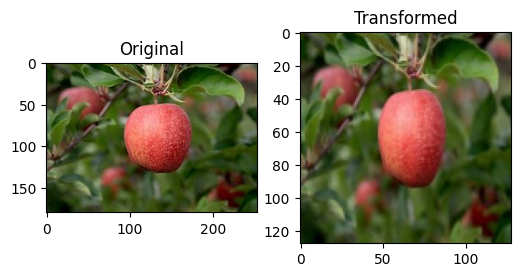

X_torch: torch.Size([3662, 3, 128, 128]) torch.float32 0.0 1.0000011920928955
X_np: (3662, 128, 128, 3) float32 0.0 1.0000012


In [ ]:
sample_path = os.path.join(img_dir, df.iloc[0]['name'])

img_raw = Image.open(sample_path).convert('RGB')
print(type(img_raw), img_raw.size)

img_t = T(img_raw)
print(type(img_t), img_t.shape, img_t.min().item(), img_t.max().item())

import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_raw)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(img_t.permute(1,2,0))
plt.title("Transformed")
plt.show()

print("X_torch:", X_torch.shape, X_torch.dtype,
      X_torch.min().item(), X_torch.max().item())

print("X_np:", X_np.shape, X_np.dtype,
      X_np.min(), X_np.max())


# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X_np, y_int, test_size=0.2, random_state=random_state, stratify=y_int)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state, stratify=y_train)

# Feature Extraction

## Color


In [ ]:
import numpy as np

def color_hist_features(X, bins=16):
    n_samples = X.shape[0]
    feats = np.zeros((n_samples, 3 * bins), dtype=np.float32)
    bin_edges = np.linspace(0.0, 1.0, bins + 1)
    for i in range(n_samples):
        img = X[i]
        hists = []
        for c in range(3):
            channel = img[:, :, c].ravel()
            hist, _ = np.histogram(channel, bins=bin_edges, density=True)
            hists.append(hist)
        feats[i] = np.concatenate(hists)
    return feats

X_train_color = color_hist_features(X_train, bins=16)
X_val_color   = color_hist_features(X_val,   bins=16)
X_test_color  = color_hist_features(X_test,  bins=16)

X_train_color.shape, X_val_color.shape, X_test_color.shape


((2196, 48), (733, 48), (733, 48))

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        43
           1       0.28      0.20      0.23        40
           2       0.69      0.67      0.68        43
           3       0.50      0.37      0.42        41
           4       0.68      0.66      0.67        41
           5       0.49      0.65      0.56        40
           6       0.41      0.41      0.41        41
           7       0.50      0.62      0.56        40
           8       0.40      0.25      0.31        40
           9       0.43      0.46      0.45        41
          10       0.74      0.65      0.69        40
          11       0.53      0.60      0.56        40
          12       0.62      0.63      0.63        41
          13       0.25      0.28      0.26        40
          14       0.54      0.53      0.53        40
          15       0.43      0.50      0.46        42
          16       0.38      0.38      

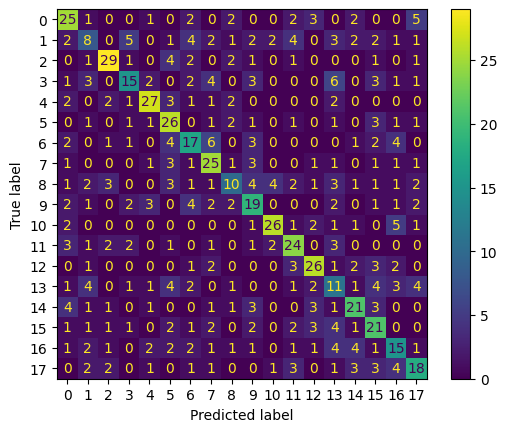

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_color = StandardScaler()
X_train_color_std = scaler_color.fit_transform(X_train_color)
X_val_color_std   = scaler_color.transform(X_val_color)
X_test_color_std  = scaler_color.transform(X_test_color)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

best_k=1 #founded with some tests

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_color_std, y_train)
y_val_pred = knn.predict(X_val_color_std)
val_acc = accuracy_score(y_val, y_val_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred)).plot()
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))






## HoG (borders, form, texture)

In [ ]:
from skimage.feature import hog

def hog_features(X, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    n_samples = X.shape[0]
    feats_list = []
    for i in range(n_samples):
        img = X[i]
        feat = hog(
            img,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            channel_axis=-1,
            feature_vector=True
        )
        feats_list.append(feat)
    feats = np.vstack(feats_list).astype(np.float32)
    return feats

X_train_hog = hog_features(X_train)
X_val_hog   = hog_features(X_val)
X_test_hog  = hog_features(X_test)

X_train_hog.shape, X_val_hog.shape, X_test_hog.shape


((2196, 8100), (733, 8100), (733, 8100))

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        43
           1       0.21      0.15      0.18        40
           2       0.71      0.40      0.51        43
           3       0.54      0.37      0.43        41
           4       0.82      0.44      0.57        41
           5       0.47      0.57      0.52        40
           6       0.27      0.10      0.14        41
           7       0.67      0.20      0.31        40
           8       0.09      0.35      0.15        40
           9       0.34      0.27      0.30        41
          10       0.47      0.23      0.31        40
          11       0.27      0.50      0.35        40
          12       0.93      0.32      0.47        41
          13       0.40      0.25      0.31        40
          14       0.19      0.28      0.22        40
          15       0.21      0.48      0.29        42
          16       0.27      0.17      

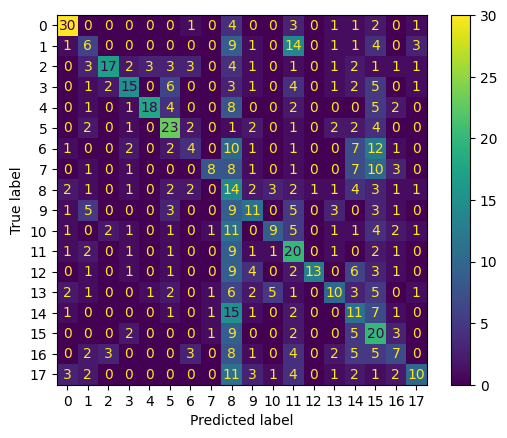

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_hog = StandardScaler()
X_train_hog_std = scaler_hog.fit_transform(X_train_hog)
X_val_hog_std   = scaler_hog.transform(X_val_hog)
X_test_hog_std  = scaler_hog.transform(X_test_hog)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

best_k=1 #founded with some tests

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_hog_std, y_train)
y_val_pred = knn.predict(X_val_hog_std)
val_acc = accuracy_score(y_val, y_val_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred)).plot()
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


# Dimensionality Reduction

## Concat Color & HoG + PCA

In [ ]:
import numpy as np

X_train_full = np.concatenate([X_train_color, X_train_hog], axis=1)
X_val_full   = np.concatenate([X_val_color,   X_val_hog],   axis=1)
X_test_full  = np.concatenate([X_test_color,  X_test_hog],  axis=1)

X_train_full.shape, X_val_full.shape, X_test_full.shape

from sklearn.preprocessing import StandardScaler

scaler_full = StandardScaler()
X_train_full_std = scaler_full.fit_transform(X_train_full)
X_val_full_std   = scaler_full.transform(X_val_full)
X_test_full_std  = scaler_full.transform(X_test_full)

from sklearn.decomposition import PCA
import numpy as np

pca_95 = PCA(n_components=0.95)
X_train_pca95 = pca_95.fit_transform(X_train_full_std)
X_val_pca95   = pca_95.transform(X_val_full_std)
X_test_pca95  = pca_95.transform(X_test_full_std)

print("PCA 95% - shape train:", X_train_pca95.shape)
print("PCA 95% - total explained var:", np.cumsum(pca_95.explained_variance_ratio_)[-1])

pca_250 = PCA(n_components=250)
X_train_pca250 = pca_250.fit_transform(X_train_full_std)
X_val_pca250   = pca_250.transform(X_val_full_std)
X_test_pca250  = pca_250.transform(X_test_full_std)

print("PCA 250 - shape train:", X_train_pca250.shape)
print("PCA 250 - total explained var:", np.cumsum(pca_250.explained_variance_ratio_)[-1])



PCA 95% - shape train: (2196, 1195)
PCA 95% - total explained var: 0.95007277
PCA 500 - shape train: (2196, 500)
PCA 500 - total explained var: 0.77569944
PCA 250 - shape train: (2196, 250)
PCA 250 - total explained var: 0.6226499


## SVC

(pca95, C=0.1) - Val Accuracy: 0.1187
(pca95, C=1) - Val Accuracy: 0.4270
(pca95, C=10) - Val Accuracy: 0.4570
(pca95, C=20) - Val Accuracy: 0.4570
(pca95, C=25) - Val Accuracy: 0.4570
(pca250, C=0.1) - Val Accuracy: 0.1746
(pca250, C=1) - Val Accuracy: 0.4557
(pca250, C=10) - Val Accuracy: 0.4829
(pca250, C=20) - Val Accuracy: 0.4829
(pca250, C=25) - Val Accuracy: 0.4829
(color, C=0.1) - Val Accuracy: 0.2715
(color, C=1) - Val Accuracy: 0.4652
(color, C=10) - Val Accuracy: 0.5252
(color, C=20) - Val Accuracy: 0.5402
(color, C=25) - Val Accuracy: 0.5402


Best combo is color + C=20

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54        43
           1       0.43      0.40      0.42        40
           2       0.54      0.63      0.58        43
           3       0.55      0.51      0.53        41
           4       0.72      0.71      0.72        41
           5       0.53      0.75      0.62        40
        

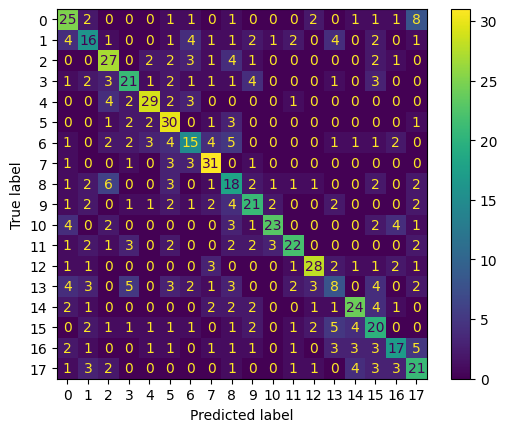

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

C_values = [0.1, 1, 10, 20, 25]

datasets = {
    "pca95":  (X_train_pca95,  X_val_pca95),
    "pca250": (X_train_pca250, X_val_pca250),
    "color": (X_train_color_std, X_val_color_std),
}

for name, (Xtr, Xva) in datasets.items():
    for C in C_values:
        svm = SVC(kernel="rbf", C=C)
        svm.fit(Xtr, y_train)
        y_val_pred = svm.predict(Xva)
        acc = accuracy_score(y_val, y_val_pred)
        print(f"({name}, C={C}) - Val Accuracy: {acc:.4f}")


#best combo is color + C=20 so:
print(f"\n\nBest combo is color + C=20")
svm = SVC(kernel="rbf", C=20)
svm.fit(X_train_color_std, y_train)
y_val_pred = svm.predict(X_val_color_std)
val_acc = accuracy_score(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred)).plot()
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))